In [52]:
import pandas as pd

In [53]:
df = pd.read_csv (r"C:\Users\Swapan Gupta\Downloads\RollingSystemDemand_20211031_0118.csv")
df.drop(df.tail(1).index,inplace=True) 
df

,HDR,ROLLING SYSTEM DEMAND
VD,20211001000000,20565.0
VD,20211001000500,20904.0
VD,20211001001000,20985.0
VD,20211001001500,20863.0
VD,20211001002000,20730.0
...,...,...
VD,20211007221500,25218.0
VD,20211007222000,24990.0
VD,20211007222500,24799.0
VD,20211007223000,24492.0


In [54]:
df1 = pd.read_csv (r"C:\Users\Swapan Gupta\Downloads\RollingSystemDemand_20211031_0118 (1).csv")
df1.drop(df1.tail(1).index,inplace=True) 
df1

,HDR,ROLLING SYSTEM DEMAND
VD,20211008000000,23084.0
VD,20211008000500,23132.0
VD,20211008001000,23079.0
VD,20211008001500,23044.0
VD,20211008002000,23003.0
...,...,...
VD,20211014221500,25753.0
VD,20211014222000,25470.0
VD,20211014222500,25001.0
VD,20211014223000,24987.0


In [55]:
new_df= df.append([df1])
new_df

,HDR,ROLLING SYSTEM DEMAND
VD,20211001000000,20565.0
VD,20211001000500,20904.0
VD,20211001001000,20985.0
VD,20211001001500,20863.0
VD,20211001002000,20730.0
...,...,...
VD,20211014221500,25753.0
VD,20211014222000,25470.0
VD,20211014222500,25001.0
VD,20211014223000,24987.0


In [56]:
new_df['HDR'] = new_df['HDR'].astype(str) # Converting HDR Column to string to split date and time

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, VD to VD
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    4000 non-null   object 
 1   ROLLING SYSTEM DEMAND  4000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.8+ KB


In [58]:
new_df['Dates'] = pd.to_datetime(new_df['HDR']).dt.date #Split Date and creating a new column Dates
new_df['Time'] = pd.to_datetime(new_df['HDR']).dt.time #Split Time and creating a new column Time
new_df['Hour'] = pd.to_datetime(new_df['HDR']).dt.hour #Split Hour and creating a new column Hour
new_df

,HDR,ROLLING SYSTEM DEMAND,Dates,Time,Hour
VD,20211001000000,20565.0,2021-10-01,00:00:00,0
VD,20211001000500,20904.0,2021-10-01,00:05:00,0
VD,20211001001000,20985.0,2021-10-01,00:10:00,0
VD,20211001001500,20863.0,2021-10-01,00:15:00,0
VD,20211001002000,20730.0,2021-10-01,00:20:00,0
...,...,...,...,...,...
VD,20211014221500,25753.0,2021-10-14,22:15:00,22
VD,20211014222000,25470.0,2021-10-14,22:20:00,22
VD,20211014222500,25001.0,2021-10-14,22:25:00,22
VD,20211014223000,24987.0,2021-10-14,22:30:00,22


In [59]:
avg_hour = new_df.groupby(new_df['Hour']).mean() #Taking the Average of Hours 
avg_hour

,ROLLING SYSTEM DEMAND
Hour,
0,22411.845238
1,22180.244048
2,21749.244048
3,21488.452381
4,21732.928571
5,24686.797619
6,28734.398810
7,30690.351190
8,31076.892857


<AxesSubplot:title={'center':'Hourly Average Usage'}, xlabel='Hour', ylabel='Power Demand'>

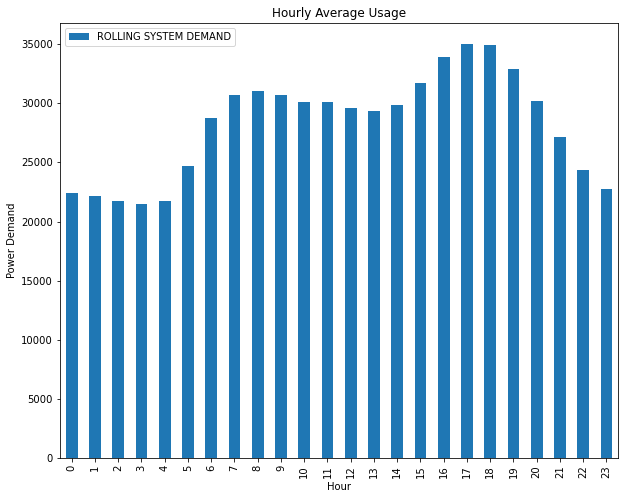

In [62]:
avg_hour.plot(kind='bar', 
              xlabel='Hour',
              ylabel='Power Demand',
              title='Hourly Average Usage',
              figsize=(10, 8))

In [63]:
all_day_hour = new_df.groupby(['Dates','Hour'])['ROLLING SYSTEM DEMAND'].mean() #Finding Mean for all the Days Selected

<AxesSubplot:title={'center':'Power Consumption in October'}, xlabel='Hour and date', ylabel='Power Demand'>

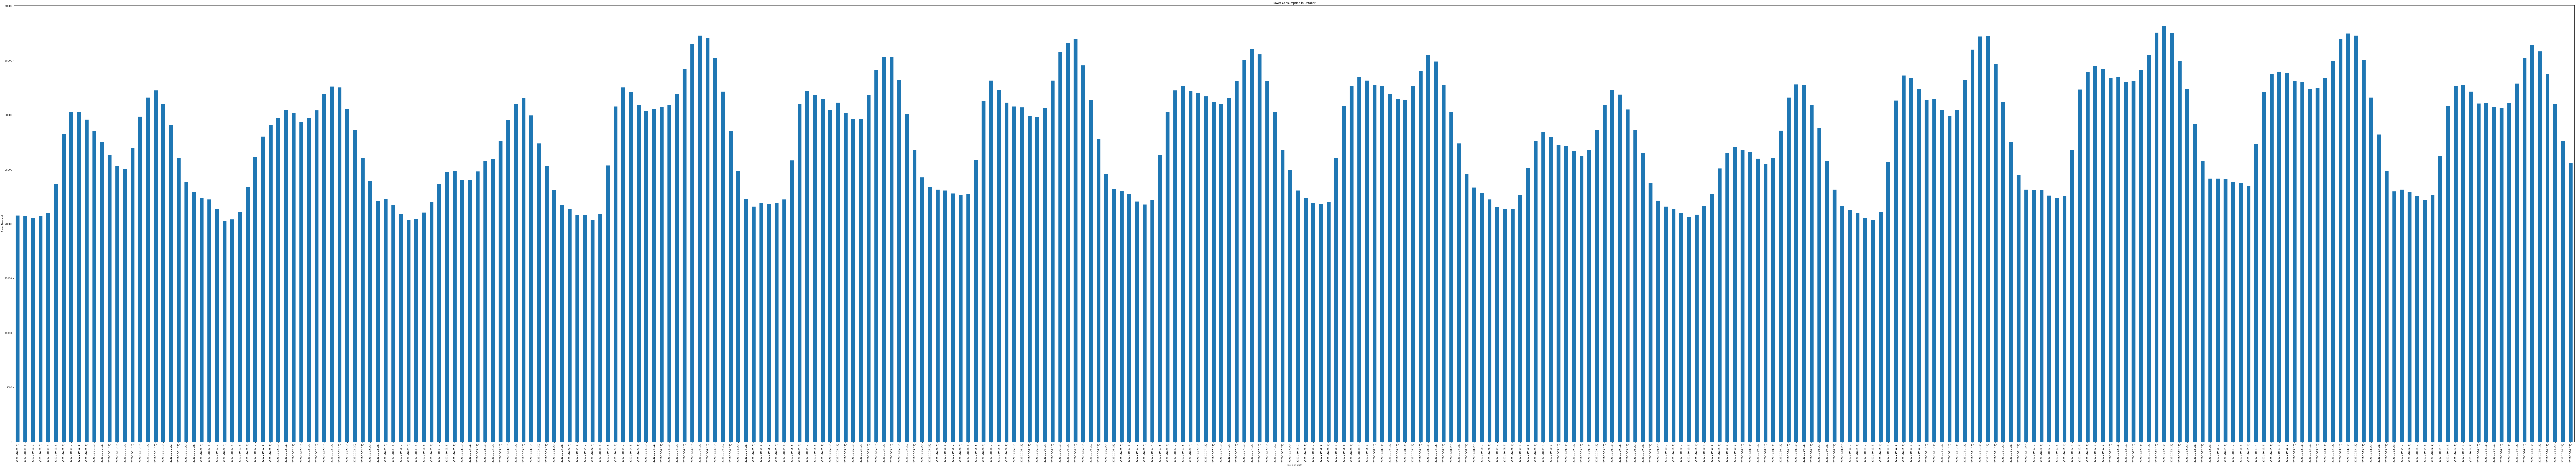

In [64]:
all_day_hour.plot(kind='bar',
            xlabel='Hour and date',
            ylabel='Power Demand',
            title='Power Consumption in October', 
            figsize=(200,35))